In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import sys
np.set_printoptions(threshold=sys.maxsize)
import warnings
warnings.filterwarnings('ignore')

In [2]:
train= pd.read_csv('train.csv')
test= pd.read_csv('test.csv')
prices= pd.read_csv('product_prices.csv')
weekNum= pd.read_csv('date_to_week_id_map.csv')

In [3]:
def explore(df):
    checkNulls= df.isna().sum()
    checkNullsPercentage= (checkNulls/df.shape[0]) * 100
    return pd.DataFrame({'Missing Values': checkNulls, "Data Type":df.dtypes, 
                         "No of Levels":df.apply(lambda x: x.nunique(),axis=0), 
                         "Levels":df.apply(lambda x: str(x.unique()),axis=0)})
print('Train: \n')
train.shape
train.head()
explore(train)
print('Test: \n')
test.head()
explore(test)
print('Prices: \n')
prices.head()
explore(prices)
print('WeekNumbers: \n')
weekNum.head()
weekNum.isna().sum()

Train: 



(395000, 7)

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales
0,2012-01-01,74,11,others,111,Maharashtra,0
1,2012-01-01,337,11,others,111,Maharashtra,1
2,2012-01-01,423,12,others,111,Maharashtra,0
3,2012-01-01,432,12,others,111,Maharashtra,0
4,2012-01-01,581,21,fast_moving_consumer_goods,111,Maharashtra,0


,Missing Values,Data Type,No of Levels,Levels
date,0,object,790,['2012-01-01' '2012-01-02' '2012-01-03' '2012-...
product_identifier,0,int64,50,[74 337 423 432 581 611 631 659 743 797 868 90...
department_identifier,0,int64,6,[11 12 21 22 31 33]
category_of_product,0,object,3,['others' 'fast_moving_consumer_goods' 'drinks...
outlet,0,int64,10,[111 112 113 114 221 222 223 331 332 333]
state,0,object,3,['Maharashtra' 'Telangana' 'Kerala']
sales,0,int64,126,[0 1 3 2 9 5 8 18 12 28 4 6 27 7 10 47 13 11 3...


Test: 



,id,date,product_identifier,department_identifier,category_of_product,outlet,state
0,1,2014-03-01,74,11,others,111,Maharashtra
1,2,2014-03-01,337,11,others,111,Maharashtra
2,3,2014-03-01,423,12,others,111,Maharashtra
3,4,2014-03-01,432,12,others,111,Maharashtra
4,5,2014-03-01,581,21,fast_moving_consumer_goods,111,Maharashtra


,Missing Values,Data Type,No of Levels,Levels
id,0,int64,15500,[1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...
date,0,object,31,['2014-03-01' '2014-03-02' '2014-03-03' '2014-...
product_identifier,0,int64,50,[74 337 423 432 581 611 631 659 743 797 868 90...
department_identifier,0,int64,6,[11 12 21 22 31 33]
category_of_product,0,object,3,['others' 'fast_moving_consumer_goods' 'drinks...
outlet,0,int64,10,[111 112 113 114 221 222 223 331 332 333]
state,0,object,3,['Maharashtra' 'Telangana' 'Kerala']


Prices: 



,outlet,product_identifier,week_id,sell_price
0,111,74,49,2.94
1,111,74,50,2.94
2,111,74,51,2.94
3,111,74,52,2.94
4,111,74,53,2.94


,Missing Values,Data Type,No of Levels,Levels
outlet,0,int64,10,[111. 112. 113. 114. 221. 222. 223. 331. 332. ...
product_identifier,0,int64,50,[ 74. 337. 423. 432. 581. 611. 631. 65...
week_id,0,int64,118,[ 49. 50. 51. 52. 53. 54. 55. 56. 57. ...
sell_price,0,float64,112,[ 2.94 3.43 7.44 7.78 6.98 0.97 4.97 4....


WeekNumbers: 



,date,week_id
0,2012-01-01,49
1,2012-01-02,49
2,2012-01-03,49
3,2012-01-04,49
4,2012-01-05,49


date       0
week_id    0
dtype: int64

## Feature Engineering

In [4]:
#Change of price: 
#A change in price of a product may affect its sales. This is capured by creating a column that contains difference 
#bettween a week's price and that of its previous week's.

tminus= prices.sell_price
tminus2= pd.DataFrame(pd.concat([pd.Series([-1]), tminus])).reset_index(drop= True)
tminus2= tminus2.drop(index= 59000)

prices2= (prices.reset_index(drop= True)).join(tminus2).reset_index(drop= True)
prices2.columns = ['outlet', 'product_identifier', 'week_id', 'sell_price', 'tminus']
prices2.head()

,outlet,product_identifier,week_id,sell_price,tminus
0,111,74,49,2.94,-1.00
1,111,74,50,2.94,2.94
2,111,74,51,2.94,2.94
3,111,74,52,2.94,2.94
4,111,74,53,2.94,2.94


In [5]:
prices2.loc[prices2.week_id== 49, 'tminus'] = prices2.loc[prices2.week_id== 49, 'sell_price']
prices2.head()

,outlet,product_identifier,week_id,sell_price,tminus
0,111,74,49,2.94,2.94
1,111,74,50,2.94,2.94
2,111,74,51,2.94,2.94
3,111,74,52,2.94,2.94
4,111,74,53,2.94,2.94


In [6]:
prices2['price_change'] = prices2['sell_price'].sub(prices2['tminus'], axis = 0) 
prices2= prices2.drop(columns= 'tminus')
prices2.head()

,outlet,product_identifier,week_id,sell_price,price_change
0,111,74,49,2.94,0.0
1,111,74,50,2.94,0.0
2,111,74,51,2.94,0.0
3,111,74,52,2.94,0.0
4,111,74,53,2.94,0.0


In [7]:
# Adding a column that contains the week number
train= pd.merge(train, weekNum, on='date', how= 'left')
test= pd.merge(test, weekNum, on='date', how= 'left')
# merging train & test with price information
train= pd.merge(train, prices2, on=['week_id', 'product_identifier', 'outlet'], how='left')
test= pd.merge(test, prices2, on=['week_id', 'product_identifier', 'outlet'], how='left')

train.tail()
test.head()

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales,week_id,sell_price,price_change
394995,2014-02-28,2932,33,drinks_and_food,333,Kerala,2,161,2.78,0.0
394996,2014-02-28,2935,33,drinks_and_food,333,Kerala,8,161,0.20,0.0
394997,2014-02-28,3004,33,drinks_and_food,333,Kerala,0,161,2.50,0.0
394998,2014-02-28,3008,33,drinks_and_food,333,Kerala,0,161,1.98,0.0
394999,2014-02-28,3021,33,drinks_and_food,333,Kerala,0,161,2.08,0.0


,id,date,product_identifier,department_identifier,category_of_product,outlet,state,week_id,sell_price,price_change
0,1,2014-03-01,74,11,others,111,Maharashtra,162,3.43,0.0
1,2,2014-03-01,337,11,others,111,Maharashtra,162,7.78,0.0
2,3,2014-03-01,423,12,others,111,Maharashtra,162,0.97,0.0
3,4,2014-03-01,432,12,others,111,Maharashtra,162,4.97,0.0
4,5,2014-03-01,581,21,fast_moving_consumer_goods,111,Maharashtra,162,4.88,0.0


## DataType Conversion

In [8]:
initialTrainMem = train.memory_usage().sum()
#Feature extraction from 'date'
for df in [train, test]:
    df['date'] = pd.to_datetime(df['date'])
    df['day'] = df['date'].dt.day
    df['weekday'] = df['date'].dt.day_name()
    df['month'] = df['date'].dt.month
    df['year']= df['date'].dt.year 
    df['weekday'] = df['weekday'].astype('str').astype('category')
    
train.head()
test.head()

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales,week_id,sell_price,price_change,day,weekday,month,year
0,2012-01-01,74,11,others,111,Maharashtra,0,49,2.94,0.0,1,Sunday,1,2012
1,2012-01-01,337,11,others,111,Maharashtra,1,49,7.44,0.0,1,Sunday,1,2012
2,2012-01-01,423,12,others,111,Maharashtra,0,49,0.97,0.0,1,Sunday,1,2012
3,2012-01-01,432,12,others,111,Maharashtra,0,49,4.97,0.0,1,Sunday,1,2012
4,2012-01-01,581,21,fast_moving_consumer_goods,111,Maharashtra,0,49,4.88,0.0,1,Sunday,1,2012


,id,date,product_identifier,department_identifier,category_of_product,outlet,state,week_id,sell_price,price_change,day,weekday,month,year
0,1,2014-03-01,74,11,others,111,Maharashtra,162,3.43,0.0,1,Saturday,3,2014
1,2,2014-03-01,337,11,others,111,Maharashtra,162,7.78,0.0,1,Saturday,3,2014
2,3,2014-03-01,423,12,others,111,Maharashtra,162,0.97,0.0,1,Saturday,3,2014
3,4,2014-03-01,432,12,others,111,Maharashtra,162,4.97,0.0,1,Saturday,3,2014
4,5,2014-03-01,581,21,fast_moving_consumer_goods,111,Maharashtra,162,4.88,0.0,1,Saturday,3,2014


In [9]:
#Checking the range of the numeric columns in order to set their precision
train.describe()
test.describe()

,product_identifier,department_identifier,outlet,sales,week_id,sell_price,price_change,day,month,year
count,395000.000000,395000.000000,395000.000000,395000.000000,395000.000000,395000.000000,395000.000000,395000.000000,395000.000000,395000.000000
mean,1509.960000,24.460000,211.200000,1.228919,105.070886,4.987644,0.000243,15.705063,6.143038,2012.611392
std,809.799518,6.337863,91.161291,3.595266,32.578749,3.874444,0.257949,8.787969,3.576092,0.622061
min,74.000000,11.000000,111.000000,0.000000,49.000000,0.050000,-37.390000,1.000000,1.000000,2012.000000
25%,926.000000,21.000000,113.000000,0.000000,77.000000,2.680000,0.000000,8.000000,3.000000,2012.000000
50%,1325.000000,22.000000,221.500000,0.000000,105.000000,3.980000,0.000000,16.000000,6.000000,2013.000000
75%,1753.000000,31.000000,331.000000,1.000000,133.000000,6.480000,0.000000,23.000000,9.000000,2013.000000
max,3021.000000,33.000000,333.000000,293.000000,161.000000,44.360000,37.390000,31.000000,12.000000,2014.000000


,id,product_identifier,department_identifier,outlet,week_id,sell_price,price_change,day,month,year
count,15500.000000,15500.000000,15500.000000,15500.000000,15500.000000,15500.000000,15500.000000,15500.00000,15500.0,15500.0
mean,7750.500000,1509.960000,24.460000,211.200000,163.741935,4.988229,0.006288,16.00000,3.0,2014.0
std,4474.608921,809.824616,6.338059,91.164117,1.294390,3.879690,0.082589,8.94456,0.0,0.0
min,1.000000,74.000000,11.000000,111.000000,162.000000,0.200000,-1.140000,1.00000,3.0,2014.0
25%,3875.750000,926.000000,21.000000,113.000000,163.000000,2.640000,0.000000,8.00000,3.0,2014.0
50%,7750.500000,1325.000000,22.000000,221.500000,164.000000,3.970000,0.000000,16.00000,3.0,2014.0
75%,11625.250000,1753.000000,31.000000,331.000000,165.000000,6.680000,0.000000,24.00000,3.0,2014.0
max,15500.000000,3021.000000,33.000000,333.000000,166.000000,25.970000,1.490000,31.00000,3.0,2014.0


In [10]:
#Categoricals
catCols= ['product_identifier', 'department_identifier', 'category_of_product', 'outlet', 'state']
train[catCols]= train[catCols].astype('str').astype('category')
test[catCols]= test[catCols].astype('str').astype('category')
#Numericals
train[['day', 'month']]= train[['day', 'month']].astype('int8')
test[['day', 'month']]= test[['day', 'month']].astype('int8')

train[['sell_price', 'price_change']]= train[['sell_price', 'price_change']].astype('float32')
test[['sell_price', 'price_change']]= test[['sell_price', 'price_change']].astype('float32')

train[['sales', 'week_id', 'year']]= train[['sales', 'week_id', 'year']].astype('int16')
test[['week_id']]= test[['week_id']].astype('int16')
test= test.drop(columns= 'id')

print('Initial memory usage', initialTrainMem)
newTrainMem = train.memory_usage().sum()
print('Memory usage after conversions', newTrainMem)
print('memory saved: ', "{0:.2f}".format((1- newTrainMem/initialTrainMem) * 100),'%')

train.dtypes
test.dtypes

Initial memory usage 34760000
Memory usage after conversions 15014152
memory saved:  56.81 %


date                     datetime64[ns]
product_identifier             category
department_identifier          category
category_of_product            category
outlet                         category
state                          category
sales                             int16
week_id                           int16
sell_price                      float32
price_change                    float32
day                                int8
weekday                        category
month                              int8
year                              int16
dtype: object

date                     datetime64[ns]
product_identifier             category
department_identifier          category
category_of_product            category
outlet                         category
state                          category
week_id                           int16
sell_price                      float32
price_change                    float32
day                                int8
weekday                        category
month                              int8
year                              int64
dtype: object

## Visualisations

In order to better understand and get a zoomed-in form of visualisations of the sales. I calculate the z-scores of the sales and the plots are based on their sale z-scores.

In [11]:
# Calculate their z-scores
train['scaledSales']  = (train['sales']  - train['sales'].mean())/train['sales'].std(ddof=0) 
train.head()

,date,product_identifier,department_identifier,category_of_product,outlet,state,sales,week_id,sell_price,price_change,day,weekday,month,year,scaledSales
0,2012-01-01,74,11,others,111,Maharashtra,0,49,2.94,0.0,1,Sunday,1,2012,-0.341816
1,2012-01-01,337,11,others,111,Maharashtra,1,49,7.44,0.0,1,Sunday,1,2012,-0.063672
2,2012-01-01,423,12,others,111,Maharashtra,0,49,0.97,0.0,1,Sunday,1,2012,-0.341816
3,2012-01-01,432,12,others,111,Maharashtra,0,49,4.97,0.0,1,Sunday,1,2012,-0.341816
4,2012-01-01,581,21,fast_moving_consumer_goods,111,Maharashtra,0,49,4.88,0.0,1,Sunday,1,2012,-0.341816


### Sales Timeline

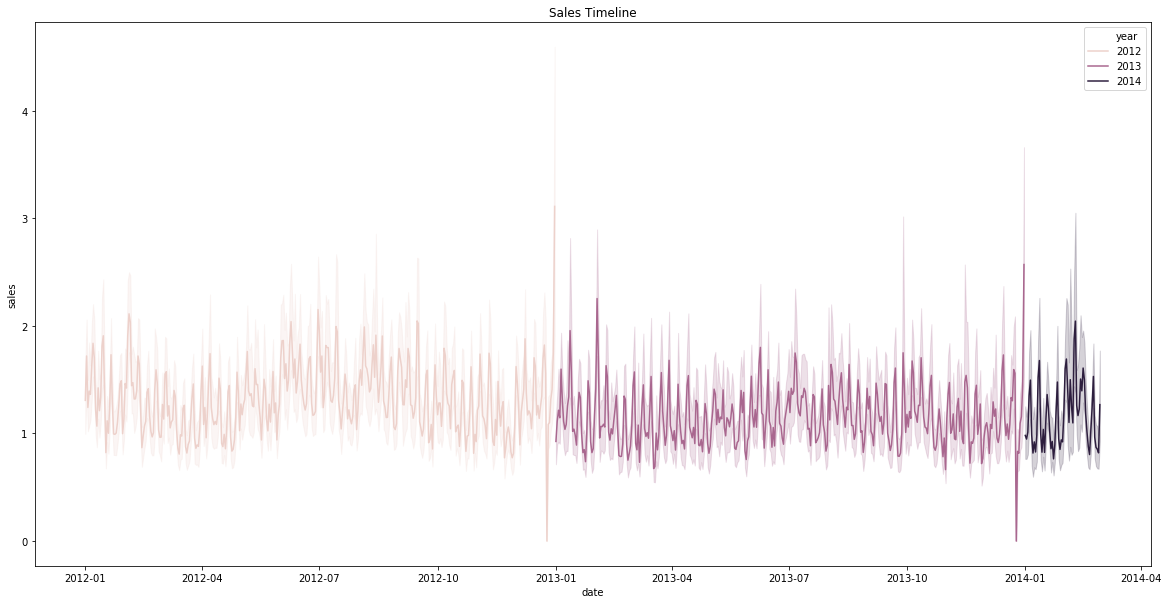

In [12]:
fig, ax = plt.subplots(figsize=(20,10));
sns.lineplot(x= 'date', y= 'sales', data= train, hue= 'year');
plt.title('Sales Timeline');

<b>Observations:</b>
1. The highest as well as the lowest sales in a year from the plot as new year's even and 
christmas day respectively. The reason behind it is self explainatory. <br>
2. There is a bump in sales in the middle of the year around June. It should be explored further. <br>

### Year-wise sales

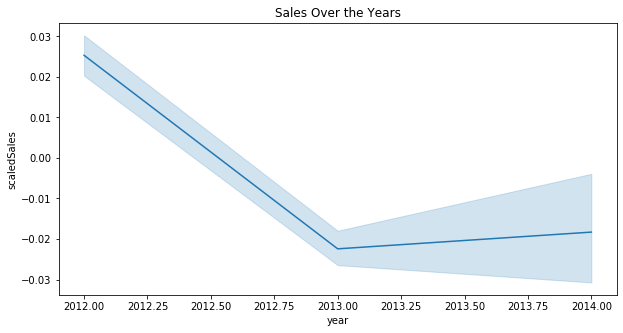

In [13]:
#Sales over the years
fig, ax = plt.subplots(figsize=(10, 5));
sns.lineplot(x= 'year', y= 'scaledSales', data= train);
plt.title('Sales Over the Years');

<b>Observations: </b><br>
The sales taken a hit in the year 2014 and showed a smaller improvement in 2014. Similar trend can be seen
with nationwide economic slowdown [1][2]. But is this merely correlation or a factor that caused decrese in the sales? It is a question to be explored for future work. <br>
Note: 2014 information consists of only Jan and Feb.
    
citations: 
1. https://www.businesstoday.in/topics/year-2013:-roundup/economy-logged-lowest-decadal-growth-rate-in-2013/story/201787.html
2. https://timesofindia.indiatimes.com/business/india-business/gdp-growth-falls-below-5-to-4-5-lowest-since-march-2013/articleshow/72301358.cms

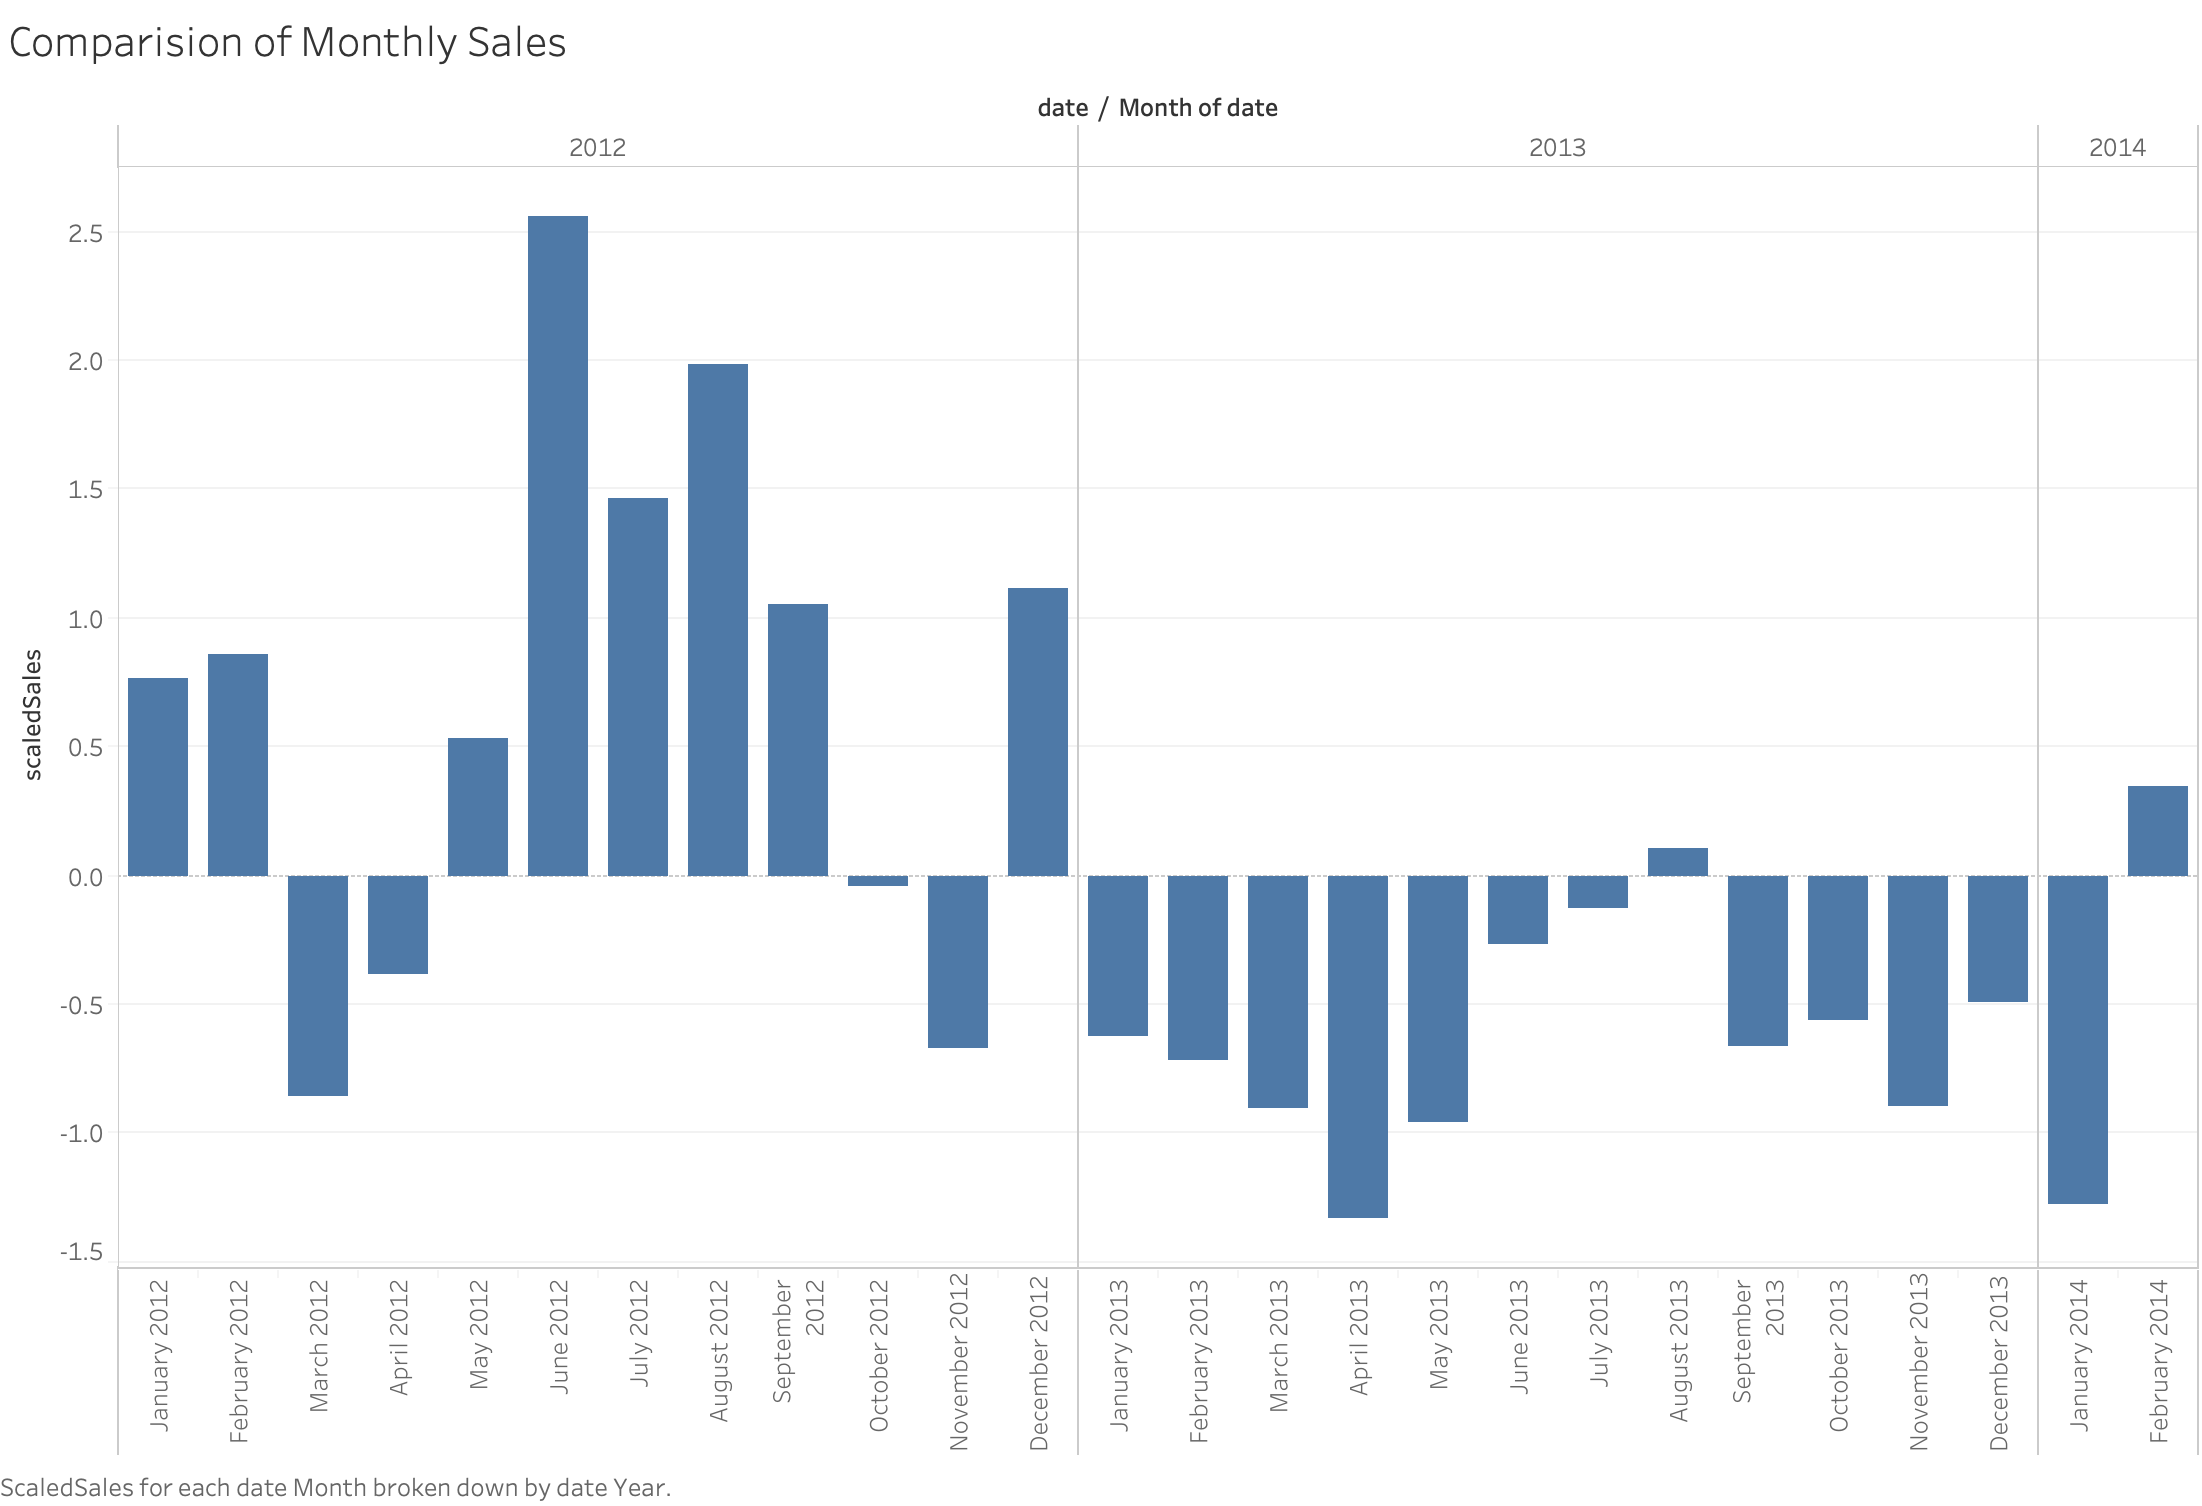

<b> Observations: </b> <br>
1. We observe the clear fall of sales in 2013. At the same time, Jan 2014 is seen to be similar to Jan 2013 and Feb 2014 can be similar to Feb 2012. Which trend would 2014 sales follow is to be predicted.<br>
2. In 2012, it can be seen that the sales in Jun, July, and Aug are high (as observed previously).
3. The sales in the month of March are consistently lower. 

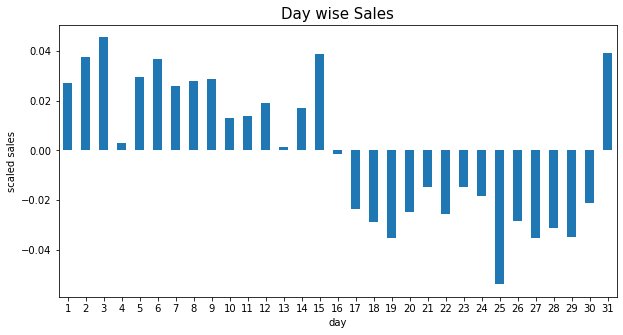

In [14]:
#Explore the average sales in a day.

fig, ax = plt.subplots(figsize=(10, 5));
(train.groupby('day')['scaledSales'].agg('mean')).plot(kind= 'bar');
plt.title('Day wise Sales', size= 15);
plt.xticks(rotation= 0);
plt.ylabel('scaled sales');

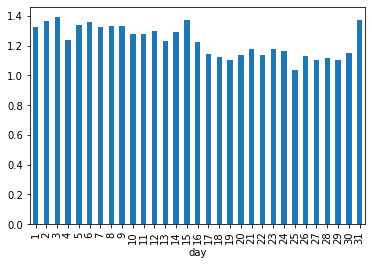

In [15]:
# Contrast the z-scores plot with real sale values plot
(train.groupby('day')['sales'].agg('mean')).plot(kind= 'bar');

<b> Observations: </b> <br>
1. It can be seen that the sales are generally higher from 31 to 15th and low from 16th to 30th. This could perhaps
be expalined by the salaries that are received in the end of a month.

### Weekday Sales

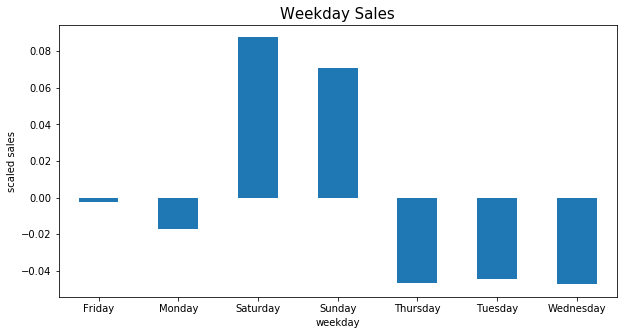

In [16]:
# Explore average sales in weekdays
fig, ax = plt.subplots(figsize=(10, 5));
(train.groupby('weekday')['scaledSales'].agg('mean')).plot(kind= 'bar')
plt.title('Weekday Sales', size= 15);
plt.xticks(rotation= 0);
plt.ylabel('scaled sales');

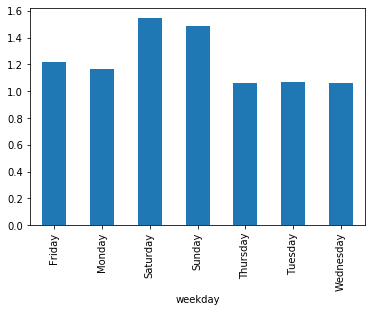

In [17]:
(train.groupby('weekday')['sales'].agg('mean')).plot(kind= 'bar')

<b>Observations: </b> <br>
1. Weekends clearly has the highest sales <br>
2. Thursday, Tuesday, Wednesday show similar low sales.

The weekday could be a good predictor of sales

### Product Category Sales
Explore which category of products are selling more/less.

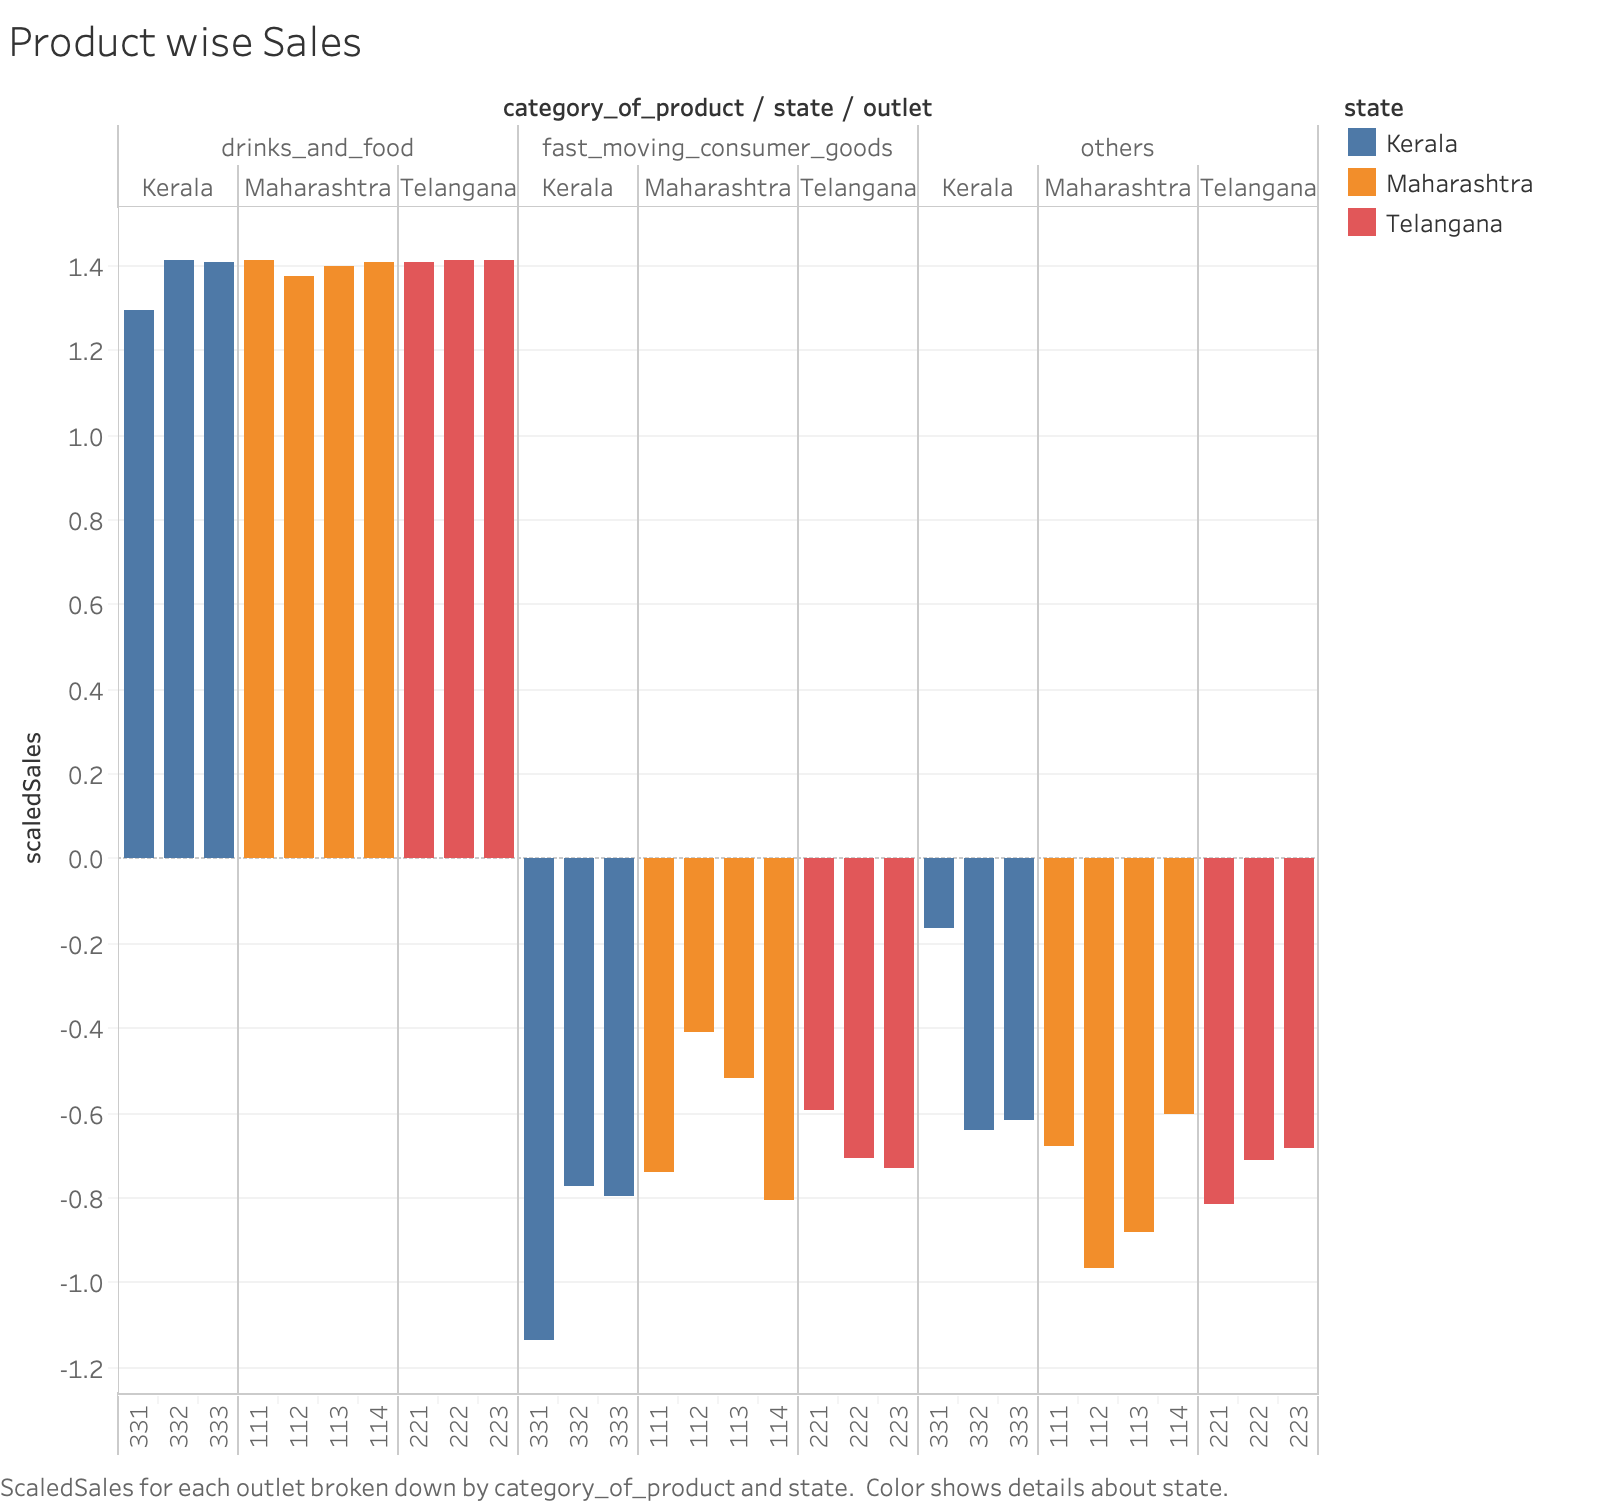

<b> Observations: </b><br>
It is extremely clear that 'drinks and food' category has the highest sales when compared to the other categories (that are similar).

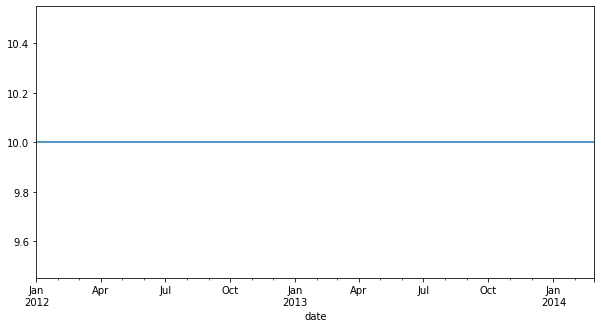

In [18]:
# All stores are open everyday
fig, ax = plt.subplots(figsize=(10, 5));
train.groupby('date')['outlet'].agg('nunique').plot(kind='line');

In [239]:
#Not a visualisation: Sales per state
train.groupby(['date', 'state'])['sales'].agg('sum').head(20)

date        state      
2012-01-01  Kerala         141
            Maharashtra    279
            Telangana      234
2012-01-02  Kerala         262
            Maharashtra    375
            Telangana      223
2012-01-03  Kerala         157
            Maharashtra    284
            Telangana      180
2012-01-04  Kerala         242
            Maharashtra    262
            Telangana      193
2012-01-05  Kerala         227
            Maharashtra    255
            Telangana      200
2012-01-06  Kerala         220
            Maharashtra    347
            Telangana      246
2012-01-07  Kerala         247
            Maharashtra    376
Name: sales, dtype: int16

The best case scenario would be if a timeseries forecasting model could be built for each product in 
each state, store etc. However, due to the given exam time constraint, I avoid time series.

## Products Sale Pattern

Lets us explore the pattern of sales each product has:

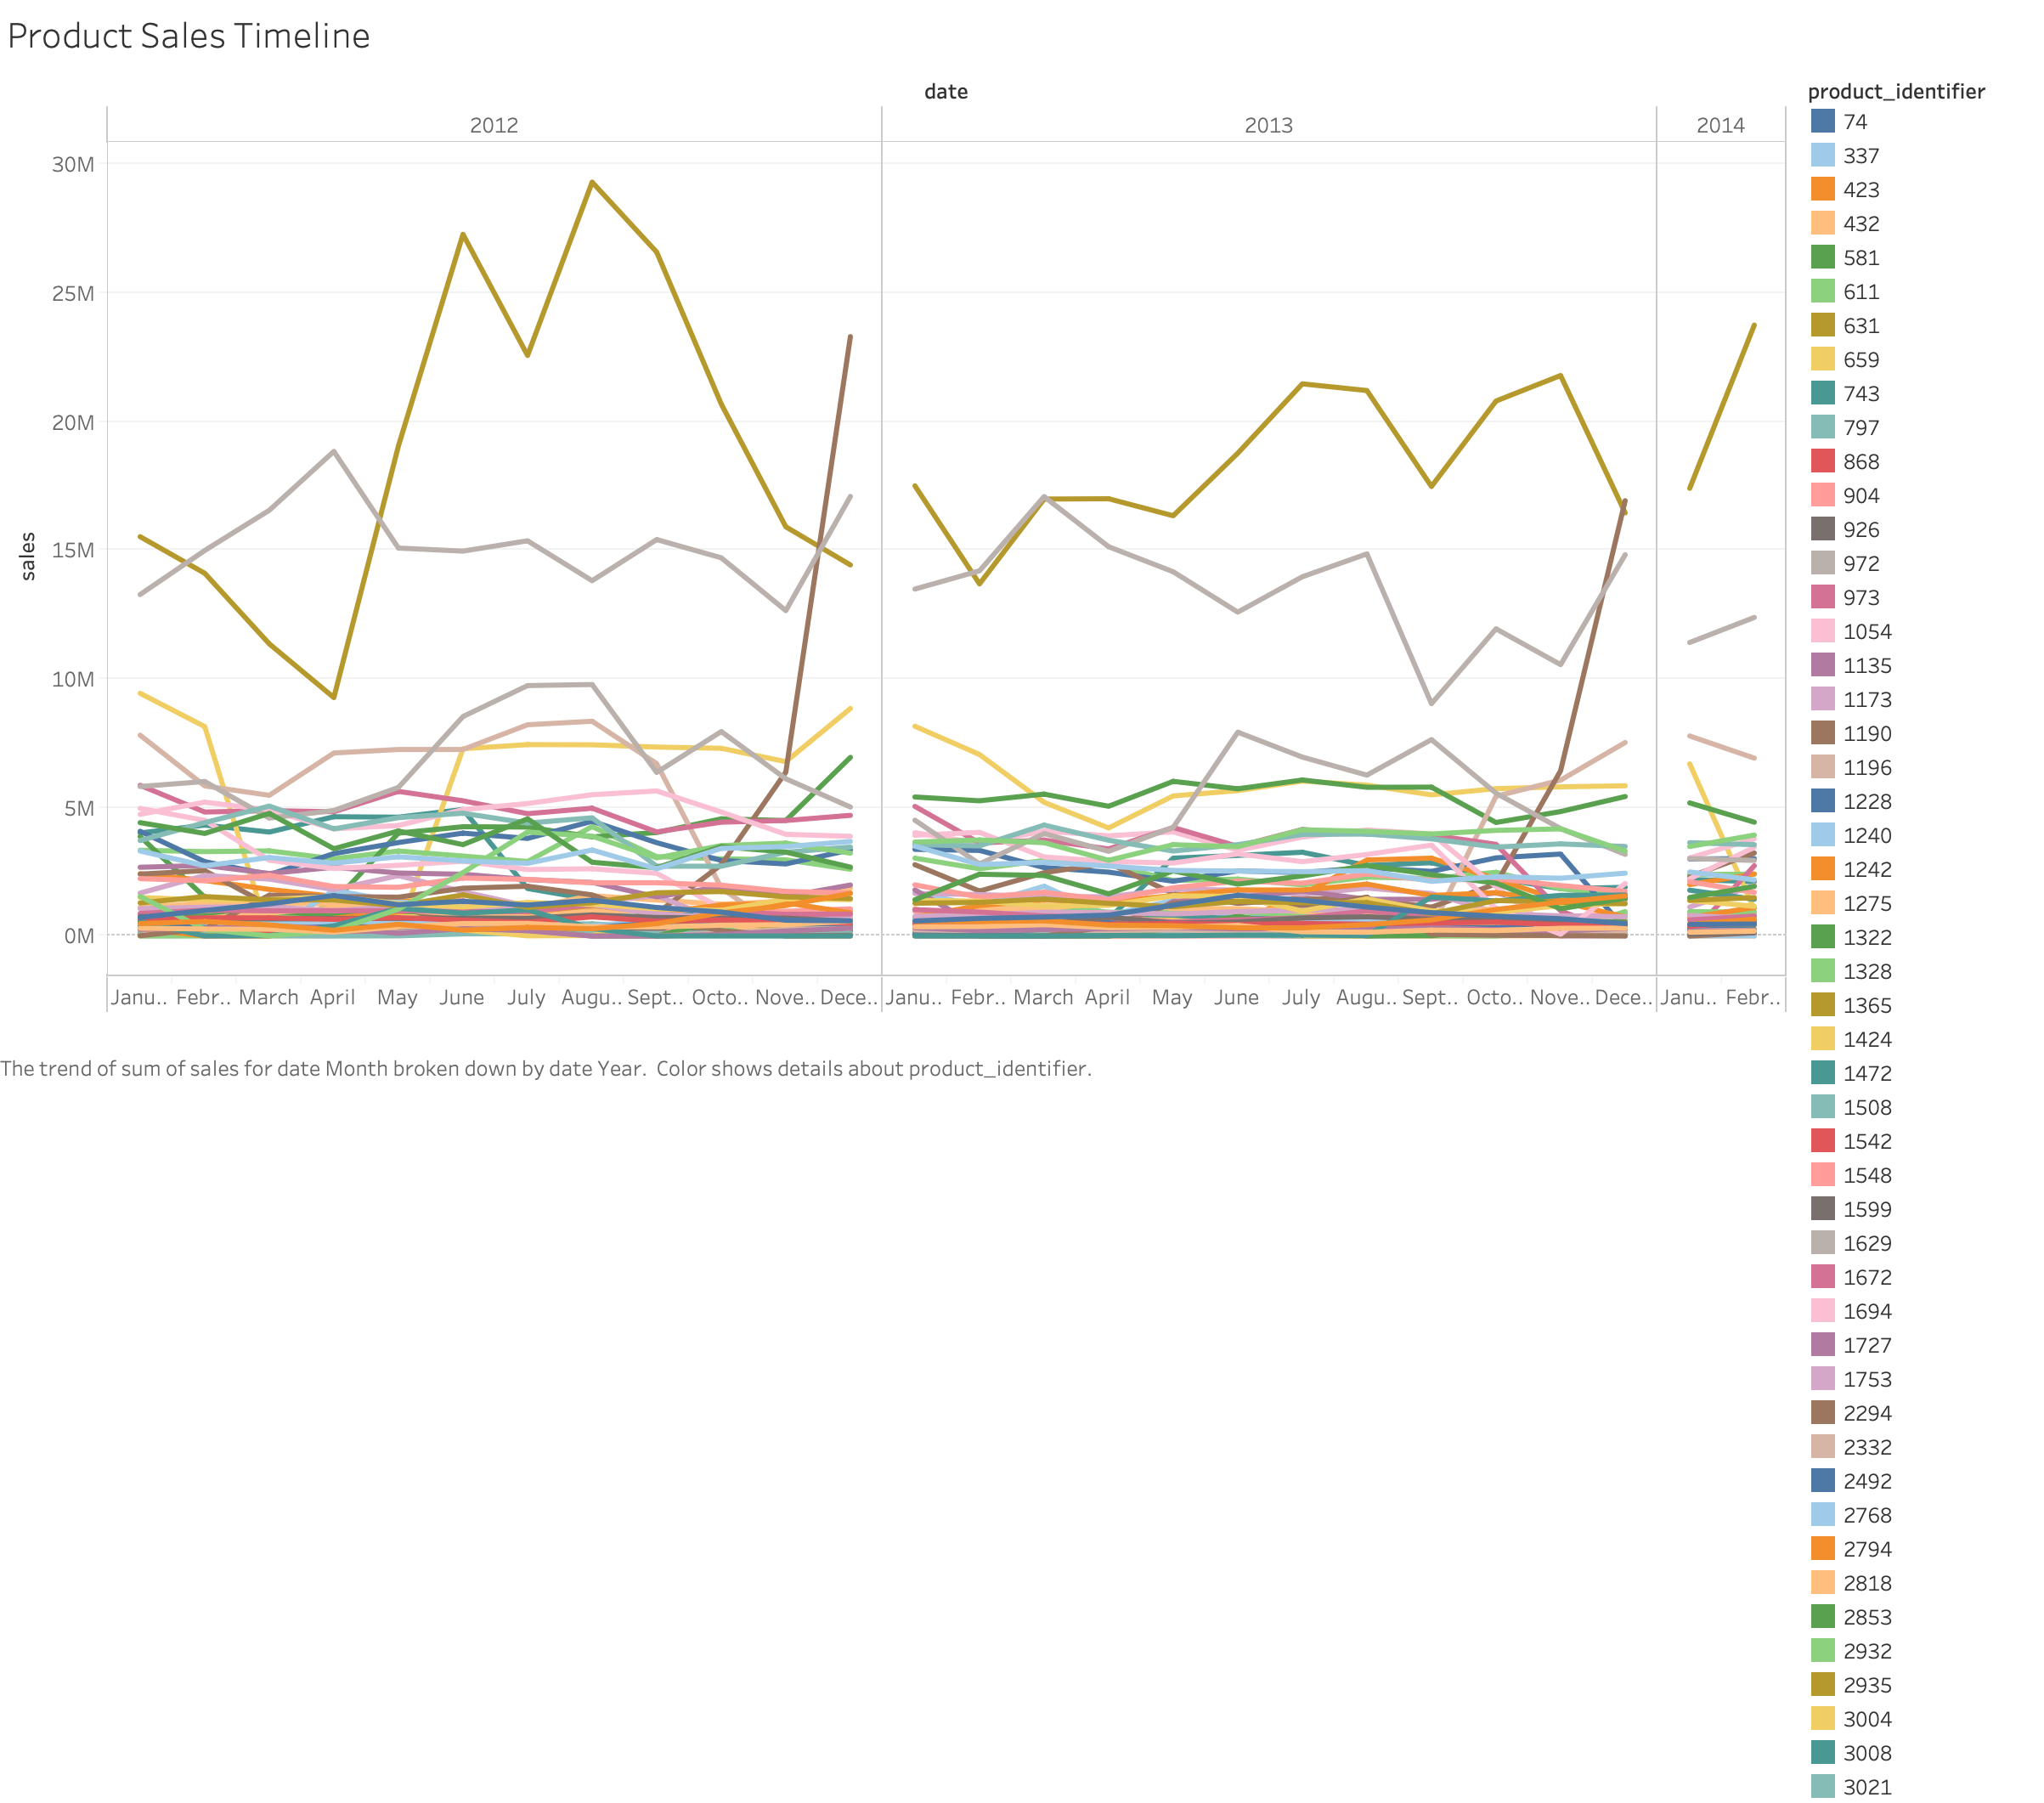

<b>Observations: </b> <br>
1. Most of the products have a near flat sales pattern and donot have significant variation comparatively.
2. Product_identifier: 2935 has both highest sales and highest variation in sales.
3. Product_identifier: 2294 shows a significant increase in December. It could be a christmas related product.

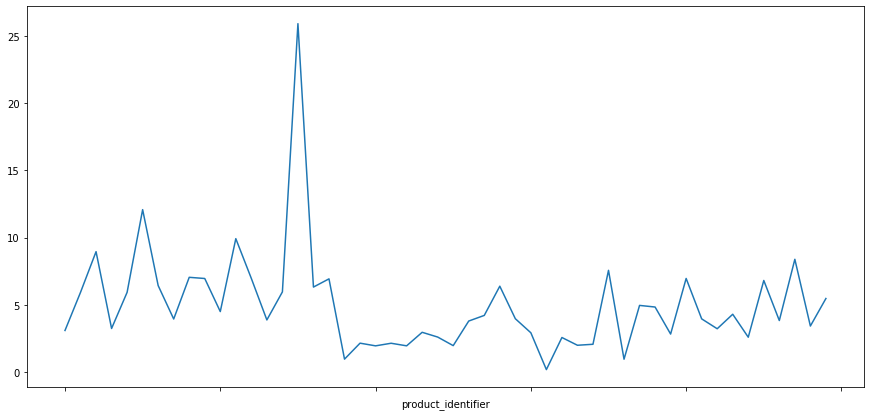

In [19]:
# Product Prices
fig, ax = plt.subplots(figsize=(15, 7));
train.groupby('product_identifier')['sell_price'].agg('mean').plot(kind='line');

<b>Observations:</b>
1. Most of the product prices are under 10. As observed previously, there was a huge fall in sales in 2013. The low
cost products may not have been affected as much as the sales of a higher price product. 
2. Product_identifier: 1542, is the product with the highest price, which is over 25. Second comes product_identifier:
1228 which is 12.

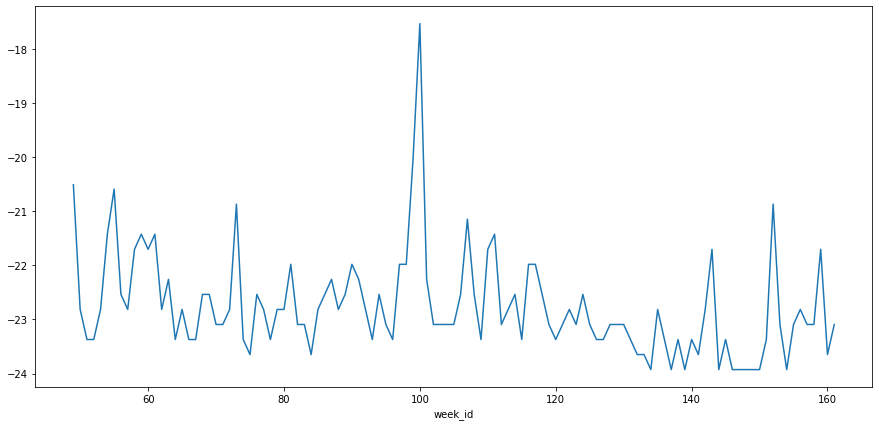

In [20]:
#Let us further explore the sales of this product. 
fig, ax = plt.subplots(figsize=(15, 7));
train.loc[train.product_identifier== '1542', :].groupby('week_id')['scaledSales'].agg('sum').plot(kind= 'line');

<b>Observations:</b>
1. It can be observed that the sale of productID 1542 has been its highest during week 100--which is Christmas week
of Dec 2012.
2. it could then be observed that the its sales gradually decrease in the following year of 2013 with a modest peak
during christmas 2013. It could then be seen to pick up as it enters 2014.

Future work: Comparision of 1542 with the sales patter of other products.

In [21]:
train= train.drop(columns= ['date', 'scaledSales'])
test= test.drop(columns= 'date')

# Train-Val Split

In [23]:
from sklearn.model_selection import train_test_split
target= 'sales'
X_train, X_val, y_train, y_val = train_test_split(train.loc[ : , train.columns != target], 
                                                  train[target], 
                                                  test_size = 0.1, 
                                                  random_state=42)

In [24]:
#Pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
import category_encoders as ce

catCols= list(X_train.select_dtypes(include= 'category'))
numCols = list(X_train.columns.difference(catCols))

numeric_transformer = Pipeline(steps=[
    ('scale', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('enc', ce.LeaveOneOutEncoder(sigma= 0.25))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numCols),
        ('cat', categorical_transformer, catCols)])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

pipeline.fit(X_train, y_train)
X_train_enc= pd.DataFrame(pipeline.transform(X_train), columns= numCols+catCols)
X_val_enc= pd.DataFrame(pipeline.transform(X_val), columns= numCols+catCols)
test_enc= pd.DataFrame(pipeline.transform(test), columns= numCols+catCols)
X_train_enc.head()

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scale',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  ['day', 'month',
                                                   'price_change', 'sell_price',
                                          

,day,month,price_change,sell_price,week_id,year,product_identifier,department_identifier,category_of_product,outlet,state,weekday
0,0.260988,-0.319265,-0.000549,-0.723853,-1.138106,-0.983301,1.308266,2.203594,2.338017,0.770428,1.358845,1.218611
1,-0.308141,-0.319265,-0.000549,-0.770270,-1.138106,-0.983301,2.188653,2.659979,2.338017,1.340370,1.102975,1.490233
2,1.399248,-0.598940,-0.000549,0.245738,0.396855,0.624590,0.122619,0.264244,0.657391,0.957772,1.183598,1.490233
3,1.285422,0.519759,-0.000549,0.900728,0.918741,0.624590,0.337319,1.213822,0.657391,1.279102,1.358845,1.065526
4,0.943944,-0.878615,-0.000549,-0.646492,0.243359,0.624590,2.188854,2.203594,2.338017,2.075842,1.358845,1.490233


# CatBoost

In [26]:
from hyperopt import tpe, STATUS_OK, Trials, hp, fmin
from functools import partial
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, recall_score, mean_squared_error

N_FOLDS = 5
MAX_EVALS = 10

space = {
        'max_depth': hp.quniform("max_depth", 5, 10, 1),
        'l2_leaf_reg': hp.quniform('l2_leaf_reg', 5, 10, 1),
        'iterations': hp.quniform('iterations', 900, 5000, 500)
}

def objective(params, n_folds = N_FOLDS):
    params = {
        'max_depth': int(params['max_depth']),
        'l2_leaf_reg': int(params['l2_leaf_reg']),
        'iterations': int(params['iterations'])
    }
    
    CBR = CatBoostRegressor(**params, 
                            verbose= False, 
                            random_seed= 52, 
                            thread_count= -1)

    CBR.fit(X_train_enc, y_train)
    skf = StratifiedKFold(n_splits = N_FOLDS, shuffle = True, random_state = 42)
    scores = cross_val_score(CBR, X_train_enc, y_train, cv= skf.split(X_train_enc, y_train), scoring = 'neg_root_mean_squared_error').mean()
    return {'loss': scores, 'params': params, 'status': STATUS_OK}

# Trials object to track progress
trials = Trials()
cb_best = fmin(fn = objective, space = space, algo = tpe.suggest, max_evals = MAX_EVALS, trials = trials)

100%|██████████| 10/10 [2:46:58<00:00, 1001.87s/it, best loss: -2.618193837127415]


In [27]:
cb_best

{'iterations': 1500.0, 'l2_leaf_reg': 7.0, 'max_depth': 6.0}

In [30]:
CBR = CatBoostRegressor(eval_metric='RMSE', 
                        iterations= 3000,
                        loss_function='RMSE', 
                        thread_count= -1, 
                        max_depth= 6, 
                        verbose= False,
                        l2_leaf_reg= 7,
                        random_seed= 52)
CBR.fit(X_train_enc, y_train, eval_set= (X_val_enc, y_val), plot= True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [32]:
CBR.best_score_
pred_train = CBR.predict(X_train_enc)
pred_val = CBR.predict(X_val_enc)
pred_test = CBR.predict(test_enc)

{'learn': {'RMSE': 2.418730159710623},
 'validation': {'RMSE': 2.537702330773631}}

# Random Forest

In [40]:
from sklearn.ensemble import RandomForestRegressor

N_FOLDS = 5
MAX_EVALS = 10

space = {
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'n_estimators': hp.quniform('n_estimators', 100, 500, 50),
    'max_features': hp.quniform('max_features', 2, 7, 1),
}

def objective(params, n_folds = N_FOLDS):
    params = {
        'max_depth': int(params['max_depth']),
        'n_estimators': int(params['n_estimators']),
        'max_features': int(params['max_features'])
    }

    # Perform n_fold cross validation with hyperparameters
    rf = RandomForestRegressor(**params, n_jobs= -1)
    skf = StratifiedKFold(n_splits= N_FOLDS, shuffle= True, random_state = 42)
    scores = cross_val_score(rf, X_train_enc, y_train, cv= skf.split(X_train_enc, y_train), scoring= 'neg_root_mean_squared_error').mean()
    return {'loss': scores, 'params': params, 'status': STATUS_OK}

# Trials object to track progress
trials = Trials()
rf_best = fmin(fn = objective, space = space, algo = tpe.suggest, max_evals = MAX_EVALS, trials = trials)

100%|██████████| 10/10 [48:23<00:00, 290.31s/it, best loss: -3.0107951708559515]


In [41]:
rf_best

{'max_depth': 3.0, 'max_features': 5.0, 'n_estimators': 300.0}

In [42]:
rf= RandomForestRegressor(max_depth= 3, max_features= 5, n_estimators= 300, n_jobs= -1)
rf.fit(X_train_enc, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=3, max_features=5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [43]:
pred_train_rf = rf.predict(X_train_enc)
pred_val_rf = rf.predict(X_val_enc)
pred_test_rf = rf.predict(test_enc)

In [44]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_train, pred_train_rf))
np.sqrt(mean_squared_error(y_val, pred_val_rf))

3.0191869621773346

3.1347705406284763

### Feature Importances

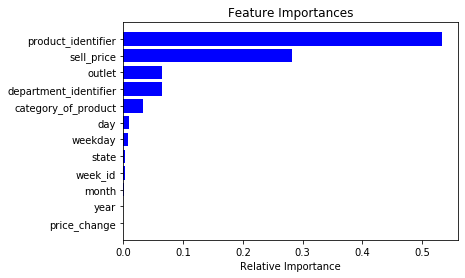

In [45]:
features = X_train_enc.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show();